In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mart_df = pd.read_csv('data-files/mart.csv')

In [4]:
mart_df.head(3)

,인허가일자,상세영업상태명,도로명주소,사업장명,업태구분명
0,2013-09-06,정상영업,서울특별시 금천구 디지털로 185 (가산동),마리오아울렛 1관,쇼핑센터
1,2012-09-13,정상영업,서울특별시 금천구 벚꽃로 266 (가산동),마리오아울렛 3관,쇼핑센터
2,2012-04-05,정상영업,"서울특별시 양천구 목동서로 100, 105호 (목동,목동3단지아파트 관리동상가)",롯데슈퍼 목동2점,구분없음


In [5]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   인허가일자    1014 non-null   object
 1   상세영업상태명  1006 non-null   object
 2   도로명주소    835 non-null    object
 3   사업장명     1014 non-null   object
 4   업태구분명    1010 non-null   object
dtypes: object(5)
memory usage: 39.7+ KB


In [6]:
mart_df = mart_df[mart_df['상세영업상태명']!='폐업처리'].reset_index(drop=True)
mart_df = mart_df[mart_df['상세영업상태명']!='휴업처리'].reset_index(drop=True) 
mart_df = mart_df[mart_df['상세영업상태명']!='직권취소'].reset_index(drop=True) 

mart_df_1 = mart_df[mart_df['인허가일자'].map(lambda v: v[:4] not in ('2023', '2024'))] # or mart_df_1[mart_df_1['인허가일자'][:4]!='2024']
mart_df_1

,인허가일자,상세영업상태명,도로명주소,사업장명,업태구분명
0,2013-09-06,정상영업,서울특별시 금천구 디지털로 185 (가산동),마리오아울렛 1관,쇼핑센터
1,2012-09-13,정상영업,서울특별시 금천구 벚꽃로 266 (가산동),마리오아울렛 3관,쇼핑센터
2,2012-04-05,정상영업,"서울특별시 양천구 목동서로 100, 105호 (목동,목동3단지아파트 관리동상가)",롯데슈퍼 목동2점,구분없음
3,1999-05-31,정상영업,서울특별시 영등포구 영등포로 109 (당산동2가),영등포유통상가,그 밖의 대규모점포
4,2012-04-24,정상영업,서울특별시 방배로33길 29,롯데슈퍼 방배2점,대형마트
...,...,...,...,...,...
732,20120320,정상영업,서울특별시 은평구 진흥로 103 (역촌동),롯데쇼핑(주) 롯데슈퍼 역촌점,그 밖의 대규모점포
733,20080822,정상영업,서울특별시 광진구 능동로 92 (자양동),롯데백화점 건대스타시티점,백화점
734,1998-03-23,정상영업,서울특별시 광진구 광나루로56길 85 (구의동),롯데쇼핑(주)롯데마트 강변점,대형마트
735,2012-05-21,정상영업,서울특별시 성북구 월계로40길 7 (장위동),롯데마이슈퍼 장위점,구분없음


In [12]:
mart_df_1['구'] = mart_df_1['도로명주소'].str.extract(r'서울특별시\s([가-힣]+구)')
mart_df_1

C:\Users\human\AppData\Local\Temp\ipykernel_23764\2821510422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mart_df_1['구'] = mart_df_1['도로명주소'].str.extract(r'서울특별시\s([가-힣]+구)')


,인허가일자,상세영업상태명,도로명주소,사업장명,업태구분명,구
0,2013-09-06,정상영업,서울특별시 금천구 디지털로 185 (가산동),마리오아울렛 1관,쇼핑센터,금천구
1,2012-09-13,정상영업,서울특별시 금천구 벚꽃로 266 (가산동),마리오아울렛 3관,쇼핑센터,금천구
2,2012-04-05,정상영업,"서울특별시 양천구 목동서로 100, 105호 (목동,목동3단지아파트 관리동상가)",롯데슈퍼 목동2점,구분없음,양천구
3,1999-05-31,정상영업,서울특별시 영등포구 영등포로 109 (당산동2가),영등포유통상가,그 밖의 대규모점포,영등포구
4,2012-04-24,정상영업,서울특별시 방배로33길 29,롯데슈퍼 방배2점,대형마트,NaN
...,...,...,...,...,...,...
732,20120320,정상영업,서울특별시 은평구 진흥로 103 (역촌동),롯데쇼핑(주) 롯데슈퍼 역촌점,그 밖의 대규모점포,은평구
733,20080822,정상영업,서울특별시 광진구 능동로 92 (자양동),롯데백화점 건대스타시티점,백화점,광진구
734,1998-03-23,정상영업,서울특별시 광진구 광나루로56길 85 (구의동),롯데쇼핑(주)롯데마트 강변점,대형마트,광진구
735,2012-05-21,정상영업,서울특별시 성북구 월계로40길 7 (장위동),롯데마이슈퍼 장위점,구분없음,성북구


In [15]:
구별_마트_개수 = mart_df_1['구'].value_counts().reset_index()
구별_마트_개수.columns = ['구', '마트_개수']
구별_마트_개수 = 구별_마트_개수.sort_values(by='마트_개수', ascending=False).reset_index(drop=True)
구별_마트_개수 = 구별_마트_개수[구별_마트_개수['구']!='압구'].reset_index(drop=True)

In [16]:
구별_마트_개수

,구,마트_개수
0,중구,57
1,강남구,47
2,송파구,40
3,영등포구,31
4,성북구,30
5,동대문구,28
6,마포구,27
7,광진구,26
8,서초구,26
9,구로구,25


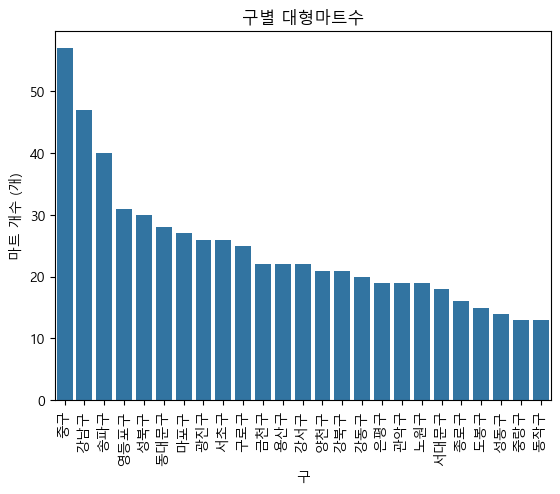

In [24]:
# 한글 패치
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# barplot
# sns.barplot( x = gu_names, y = gu_mean)
sns.barplot( data= 구별_마트_개수, x = '구', y = '마트_개수')
plt.xticks(rotation=90)
plt.title('구별 대형마트수')
plt.xlabel('구')
plt.ylabel('마트 개수 (개)')
plt.show()